In [84]:
import pandas as pd
import matplotlib.pyplot as plt

import torch
import numpy as np

from brokenaxes import brokenaxes

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [85]:
# CSV 파일에 접근
maml_info = pd.read_csv('../MAML_5way_5shot/MAML_5way_5shot_inner_loop_test.csv')
# maml_info = pd.read_csv('../MAML_5way_5shot_filter64/MAML_5way_5shot_filter64_inner_loop_test.csv')
arbiter_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop_test.csv')

# 훈련 정보만 가지고 온다
maml_info_train = maml_info[maml_info['phase']=='val']
arbiter_info_train= arbiter_info[arbiter_info['phase']=='val']

# 1. 정보를 Domain 별로 압축

In [86]:
maml_info_mini_imagenet = maml_info_train[maml_info_train['current_iter']=='mini_imagenet_full_size']
maml_info_mini_imagenet = maml_info_mini_imagenet.groupby('num_step')

maml_info_tiered_imagenet = maml_info_train[maml_info_train['current_iter']=='tiered_imagenet']
maml_info_tiered_imagenet = maml_info_tiered_imagenet.groupby('num_step')

maml_info_cifar_fs = maml_info_train[maml_info_train['current_iter']=='CIFAR_FS']
maml_info_cifar_fs = maml_info_cifar_fs.groupby('num_step')

maml_info_CUB = maml_info_train[maml_info_train['current_iter']=='CUB']
maml_info_CUB = maml_info_CUB.groupby('num_step')

In [87]:
# mini-imagenet
arbiter_info_mini_imagenet = arbiter_info[arbiter_info['current_iter']=='mini_imagenet_full_size']
arbiter_info_mini_imagenet = arbiter_info_mini_imagenet.groupby('num_step')


# CUB
arbiter_info_tiered_imagenet = arbiter_info[arbiter_info['current_iter']=='tiered_imagenet']
arbiter_info_tiered_imagenet = arbiter_info_tiered_imagenet.groupby('num_step')

# CIFAR_FS
arbiter_info_CIFAR_FS = arbiter_info[arbiter_info['current_iter']=='CIFAR_FS']
arbiter_info_CIFAR_FS = arbiter_info_CIFAR_FS.groupby('num_step')

# CUB
arbiter_info_CUB = arbiter_info[arbiter_info['current_iter']=='CUB']
arbiter_info_CUB = arbiter_info_CUB.groupby('num_step')

# miniImageNet

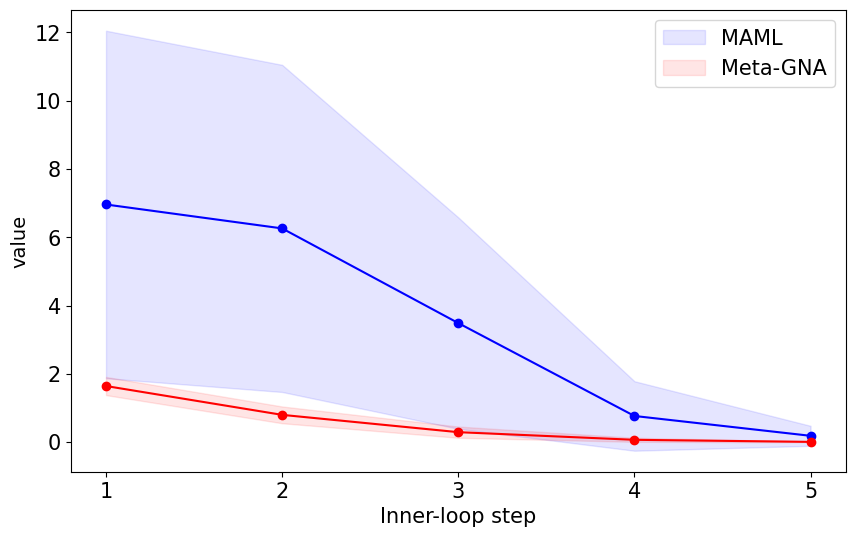

In [88]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))
        
maml_miniimagenet_mean_df = maml_info_mini_imagenet['loss_mean'].mean()
maml_miniimagenet_std_devs = maml_info_mini_imagenet['loss_std'].mean()

arbiter_miniimagenet_mean_df = arbiter_info_mini_imagenet['loss_mean'].mean()
arbiter_miniimagenet_std_devs = arbiter_info_mini_imagenet['loss_std'].mean()

plt.figure(figsize=(10, 6))

plt.plot(x, maml_miniimagenet_mean_df, '-o', color='b')
plt.fill_between(x, maml_miniimagenet_mean_df - maml_miniimagenet_std_devs, maml_miniimagenet_mean_df + maml_miniimagenet_std_devs, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_miniimagenet_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_miniimagenet_mean_df - arbiter_miniimagenet_std_devs, arbiter_miniimagenet_mean_df + arbiter_miniimagenet_std_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('value', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('miniImageNet_loss_distribution' + '.png')

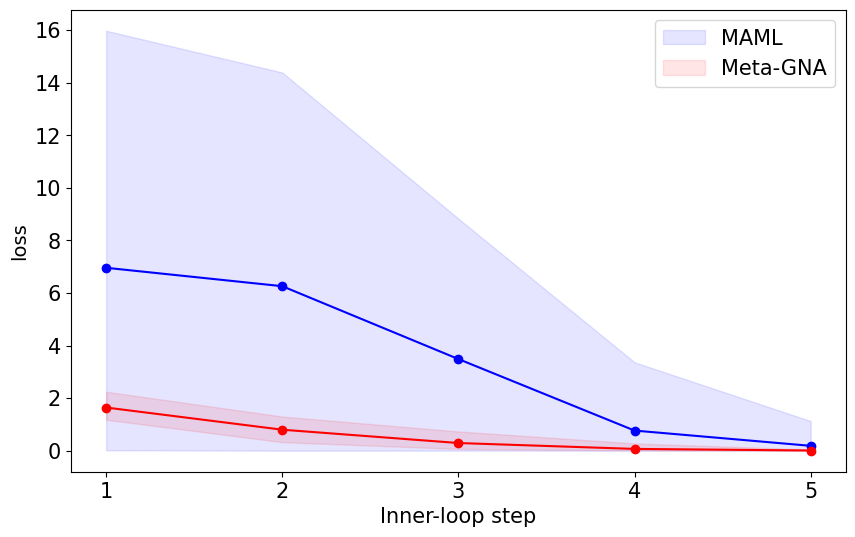

In [89]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))
           
maml_miniimagenet_mean_df = maml_info_mini_imagenet['loss_mean'].mean()
maml_miniimagenet_max_df = maml_info_mini_imagenet['loss_max'].mean()
maml_miniimagenet_min_devs = maml_info_mini_imagenet['loss_min'].mean()

arbiter_miniimagenet_mean_df = arbiter_info_mini_imagenet['loss_mean'].mean()
arbiter_miniimagenet_max_df = arbiter_info_mini_imagenet['loss_max'].mean()
arbiter_miniimagenet_min_devs = arbiter_info_mini_imagenet['loss_min'].mean()

plt.figure(figsize=(10, 6))

plt.plot(x, maml_miniimagenet_mean_df, '-o', color='b')
plt.fill_between(x, maml_miniimagenet_max_df, maml_miniimagenet_min_devs, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_miniimagenet_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_miniimagenet_max_df, arbiter_miniimagenet_min_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('loss', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('miniimagenet_min_max_loss_distribution' + '.png')

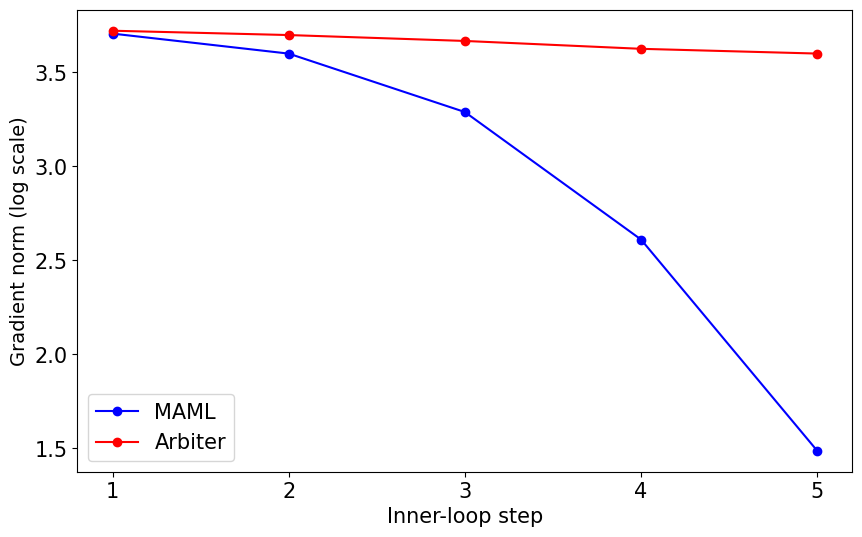

In [90]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['all_grads_l2norm'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['all_grads_l2norm'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
# plt.plot(x, before_arbiter_mean_df, '-o', color='g', label='before_Arbiter')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

plt.legend()


# plt.title('Gradient Norm')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('Gradient norm (log scale)', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('miniImageNet_gradient_norm' + '.png')

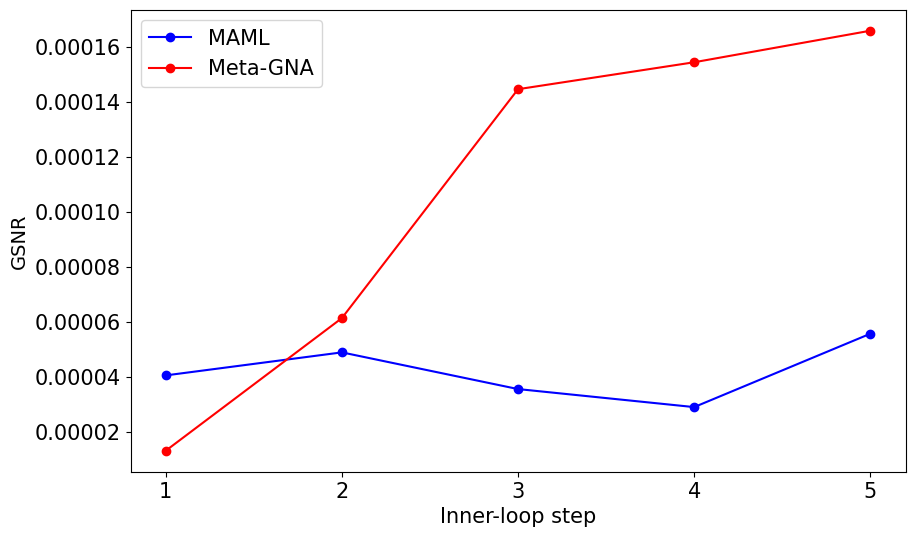

In [91]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['gsnr'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['gsnr'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Meta-GNA')

# plt.title('GSNR')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('GSNR', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('miniImageNet_gsnr' + '.png')

# tiered_imagenet

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


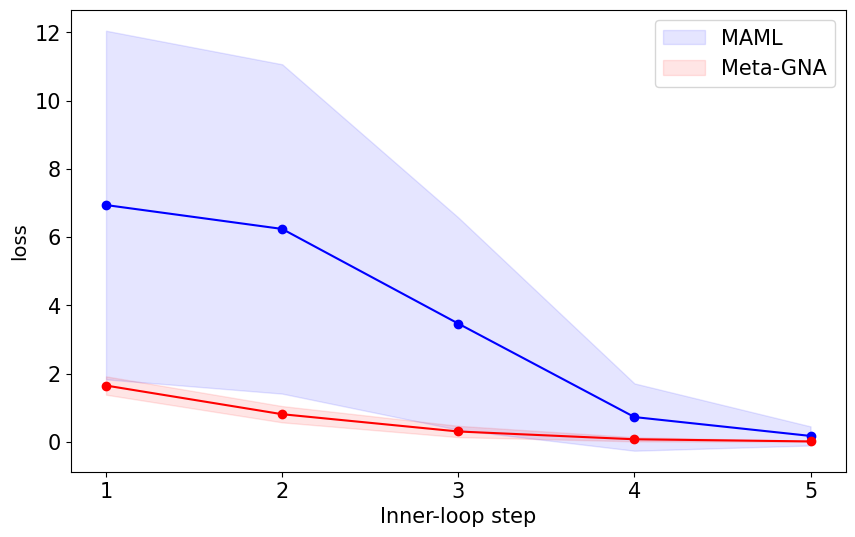

In [92]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))
        
maml_tiered_imagenet_mean_df = maml_info_tiered_imagenet['loss_mean'].mean()
maml_tiered_imagenet_std_devs = maml_info_tiered_imagenet['loss_std'].mean()

arbiter_tiered_imagenet_mean_df = arbiter_info_tiered_imagenet['loss_mean'].mean()
arbiter_tiered_imagenet_std_devs = arbiter_info_tiered_imagenet['loss_std'].mean()

plt.figure(figsize=(10, 6))

plt.legend(fontsize=15)

plt.plot(x, maml_tiered_imagenet_mean_df, '-o', color='b')
plt.fill_between(x, maml_tiered_imagenet_mean_df - maml_tiered_imagenet_std_devs, maml_tiered_imagenet_mean_df + maml_tiered_imagenet_std_devs, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_tiered_imagenet_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_tiered_imagenet_mean_df - arbiter_tiered_imagenet_std_devs, arbiter_tiered_imagenet_mean_df + arbiter_tiered_imagenet_std_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('loss', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('tiered_imagenet_loss_distribution' + '.png')

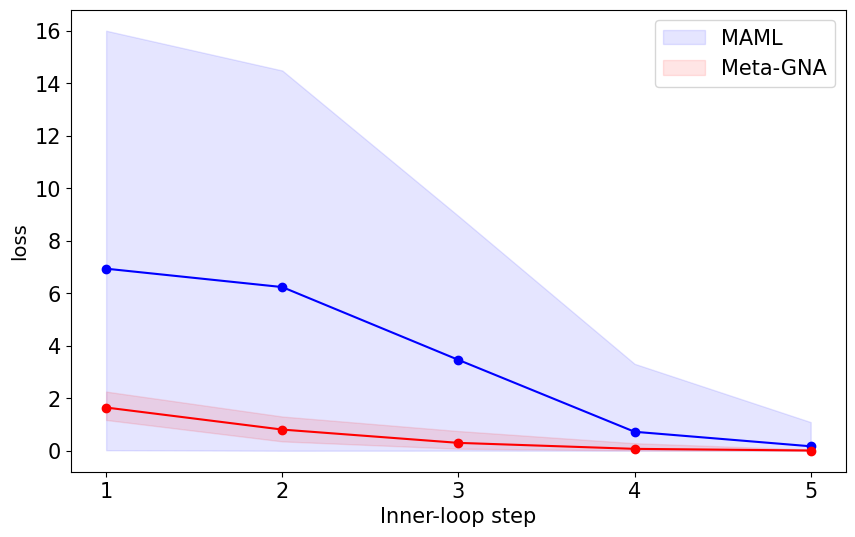

In [93]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))

maml_tiered_imagenet_mean_df = maml_info_tiered_imagenet['loss_mean'].mean()
maml_tiered_imagenet_max_df = maml_info_tiered_imagenet['loss_max'].mean()
maml_tiered_imagenet_min_devs = maml_info_tiered_imagenet['loss_min'].mean()

arbiter_tiered_imagenet_mean_df = arbiter_info_tiered_imagenet['loss_mean'].mean()
arbiter_tiered_imagenet_max_df = arbiter_info_tiered_imagenet['loss_max'].mean()
arbiter_tiered_imagenet_min_devs = arbiter_info_tiered_imagenet['loss_min'].mean()

plt.figure(figsize=(10, 6))

plt.plot(x, maml_tiered_imagenet_mean_df, '-o', color='b')
plt.fill_between(x, maml_tiered_imagenet_max_df, maml_tiered_imagenet_min_devs, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_tiered_imagenet_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_tiered_imagenet_max_df, arbiter_tiered_imagenet_min_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('loss', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('tiered_imagenet_min_max_loss_distribution' + '.png')

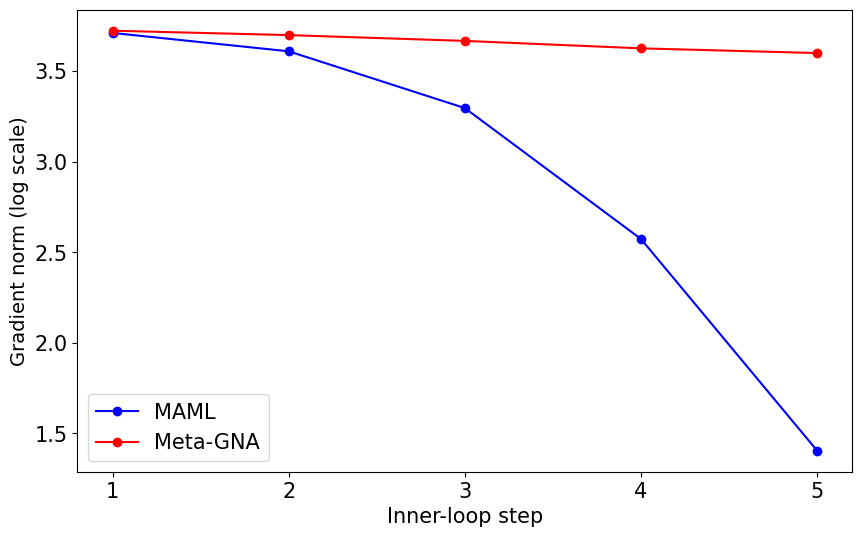

In [94]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))
        
maml_mean_df = maml_info_tiered_imagenet['all_grads_l2norm'].mean()
arbiter_mean_df = arbiter_info_tiered_imagenet['all_grads_l2norm'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
# plt.plot(x, before_arbiter_mean_df, '-o', color='g', label='before_Arbiter')
plt.plot(x, arbiter_means, '-o', color='r', label='Meta-GNA')

plt.legend()

# plt.title('Gradient Norm')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('Gradient norm (log scale)', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('tiered_imagenet_gradient_norm' + '.png')

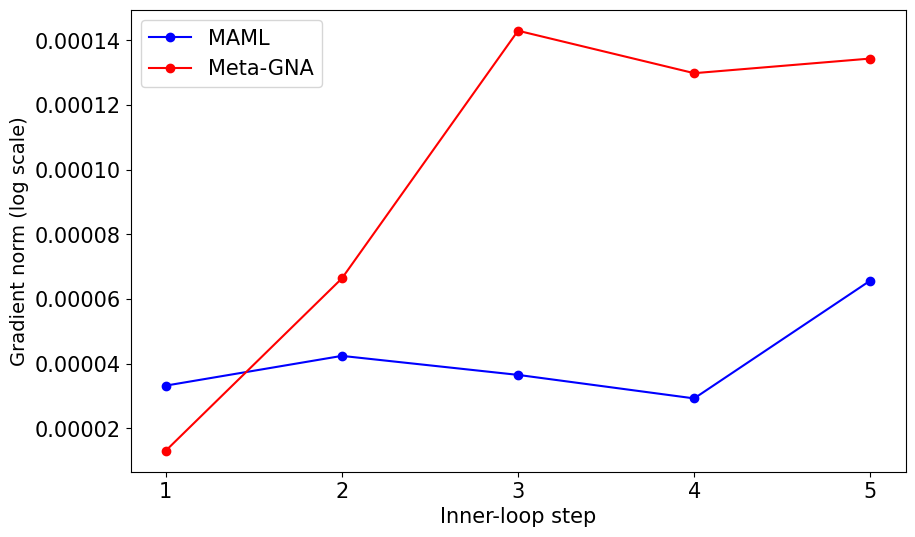

In [95]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))
        
maml_mean_df = maml_info_tiered_imagenet['gsnr'].mean()
arbiter_mean_df = arbiter_info_tiered_imagenet['gsnr'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Meta-GNA')

# plt.title('GSNR')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('Gradient norm (log scale)', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('tiered_imagenet_gsnr' + '.png')

# CUB

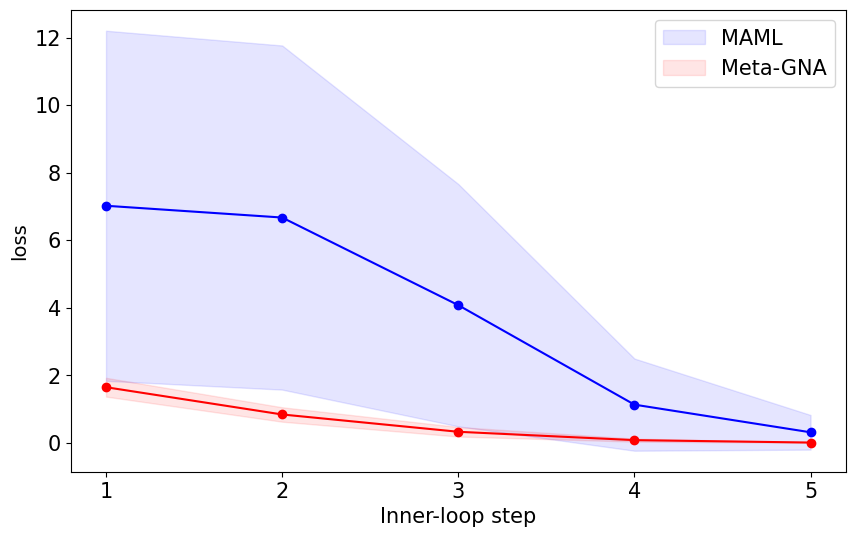

In [96]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))
        
maml_CUB_mean_df = maml_info_CUB['loss_mean'].mean()
maml_CUB_std_devs = maml_info_CUB['loss_std'].mean()

arbiter_CUB_mean_df = arbiter_info_CUB['loss_mean'].mean()
arbiter_CUB_std_devs = arbiter_info_CUB['loss_std'].mean()

plt.figure(figsize=(10, 6))

plt.plot(x, maml_CUB_mean_df, '-o', color='b')
plt.fill_between(x, maml_CUB_mean_df - maml_CUB_std_devs, maml_CUB_mean_df + maml_CUB_std_devs, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_CUB_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_CUB_mean_df - arbiter_CUB_std_devs, arbiter_CUB_mean_df + arbiter_CUB_std_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('loss', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('CUB_loss_distribution' + '.png')

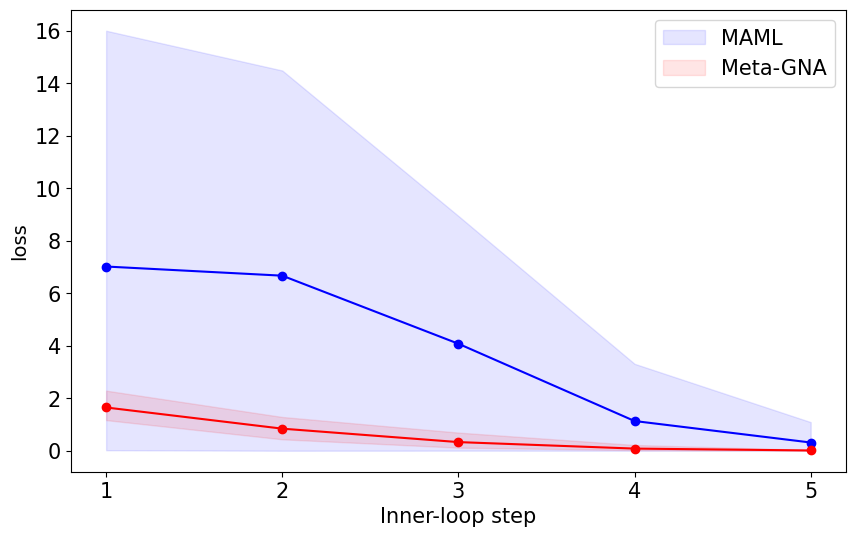

In [97]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))

maml_tiered_CUB_mean_df = maml_info_CUB['loss_mean'].mean()
maml_tiered_CUB_max_df = maml_info_tiered_imagenet['loss_max'].mean()
maml_tiered_CUB_min_devs = maml_info_tiered_imagenet['loss_min'].mean()

arbiter_CUB_mean_df = arbiter_info_CUB['loss_mean'].mean()
arbiter_CUB_max_df = arbiter_info_CUB['loss_max'].mean()
arbiter_CUB_min_devs = arbiter_info_CUB['loss_min'].mean()

plt.figure(figsize=(10, 6))

plt.plot(x, maml_tiered_CUB_mean_df, '-o', color='b')
plt.fill_between(x, maml_tiered_CUB_max_df, maml_tiered_CUB_min_devs, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_CUB_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_CUB_max_df, arbiter_CUB_min_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('loss', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('CUB_min_max_loss_distribution' + '.png')

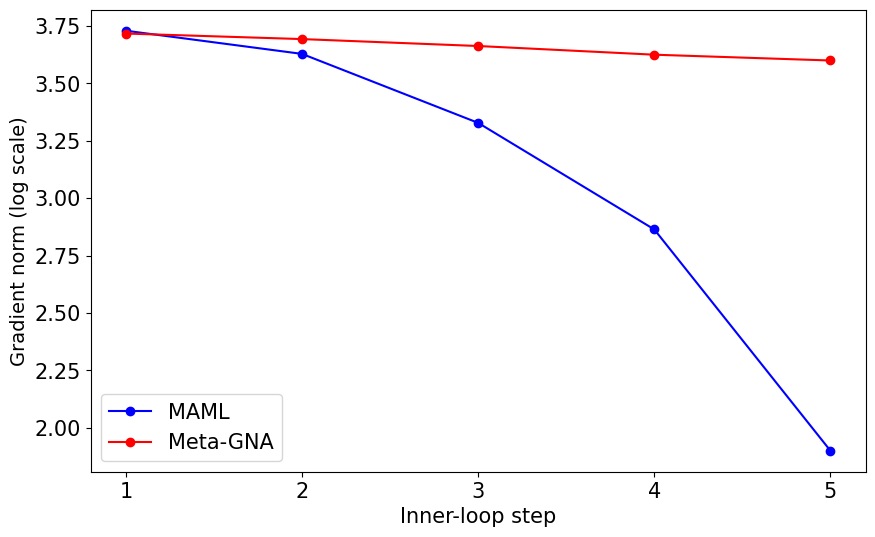

In [98]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))
        
maml_mean_df = maml_info_CUB['all_grads_l2norm'].mean()
arbiter_mean_df = arbiter_info_CUB['all_grads_l2norm'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
# plt.plot(x, before_arbiter_mean_df, '-o', color='g', label='before_Arbiter')
plt.plot(x, arbiter_means, '-o', color='r', label='Meta-GNA')

plt.legend()


# plt.title('Gradient Norm')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('Gradient norm (log scale)', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('CUB_gradient_norm' + '.png')

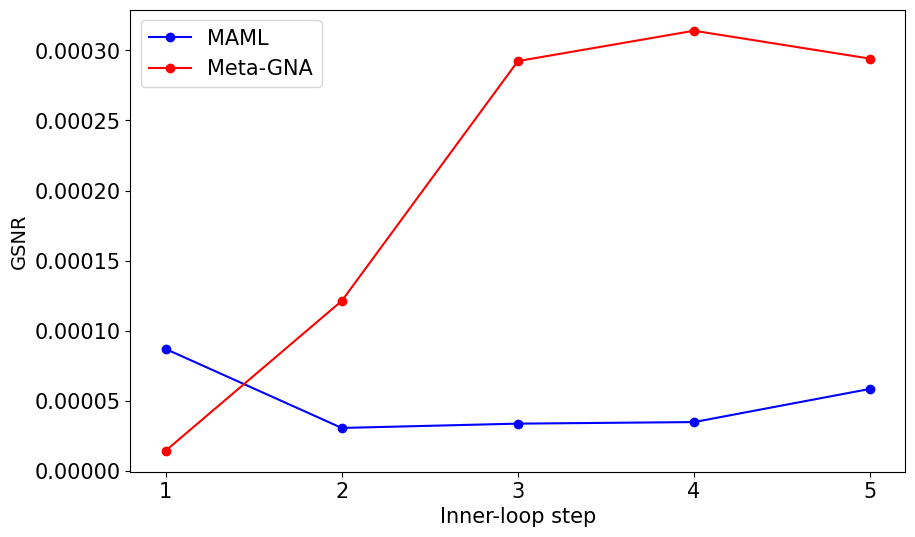

In [99]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))
        
maml_mean_df = maml_info_CUB['gsnr'].mean()
arbiter_mean_df = arbiter_info_CUB['gsnr'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Meta-GNA')

# plt.title('GSNR')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('GSNR', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('CUB_gsnr' + '.png')

# CIFAR-FS

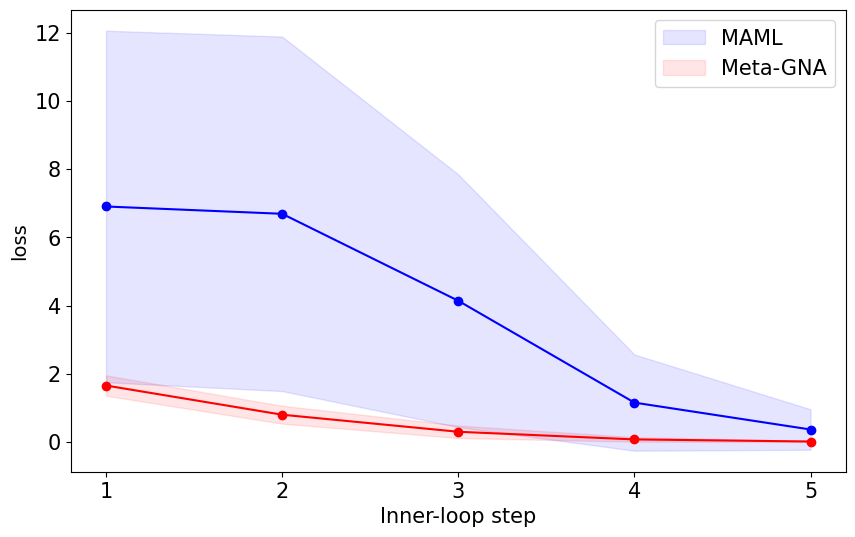

In [100]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))
        
maml_mean_df = maml_info_cifar_fs['loss_mean'].mean()
maml_std_devs = maml_info_cifar_fs['loss_std'].mean()

arbiter_mean_df = arbiter_info_CIFAR_FS['loss_mean'].mean()
arbiter_std_devs = arbiter_info_CIFAR_FS['loss_std'].mean()

plt.figure(figsize=(10, 6))

plt.plot(x, maml_mean_df, '-o', color='b')
plt.fill_between(x, maml_mean_df - maml_std_devs, maml_mean_df + maml_std_devs, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_mean_df - arbiter_std_devs, arbiter_mean_df + arbiter_std_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('loss', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('cifar-fs_loss_distribution' + '.png')

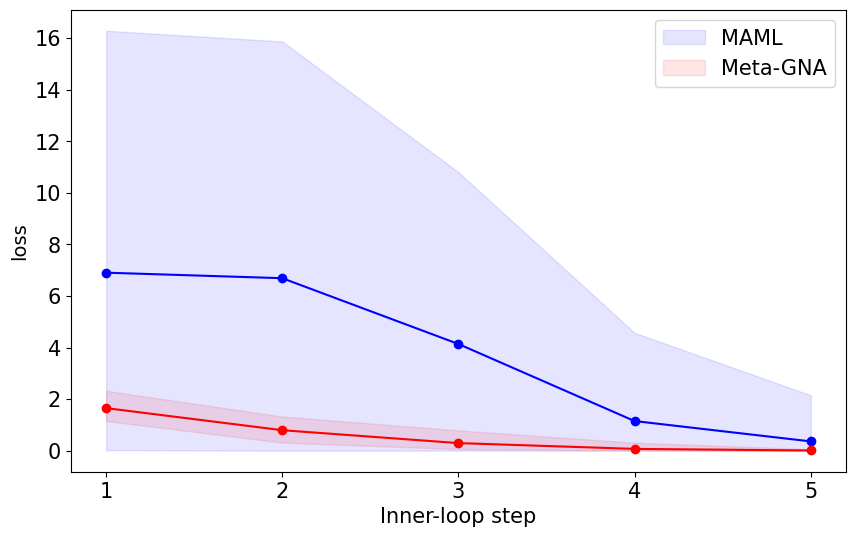

In [101]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))

maml_cifar_fs_mean_df = maml_info_cifar_fs['loss_mean'].mean()
maml_cifar_fs_max_df = maml_info_cifar_fs['loss_max'].mean()
maml_cifar_fs_min_devs = maml_info_cifar_fs['loss_min'].mean()

arbiter_cifar_fs_mean_df = arbiter_info_CIFAR_FS['loss_mean'].mean()
arbiter_cifar_fs_max_df = arbiter_info_CIFAR_FS['loss_max'].mean()
arbiter_cifar_fs_min_devs = arbiter_info_CIFAR_FS['loss_min'].mean()

plt.figure(figsize=(10, 6))

plt.plot(x, maml_cifar_fs_mean_df, '-o', color='b')
plt.fill_between(x, maml_cifar_fs_max_df, maml_cifar_fs_min_devs, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_cifar_fs_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_cifar_fs_max_df, arbiter_cifar_fs_min_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('loss', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('cifar_fs_min_max_loss_distribution' + '.png')

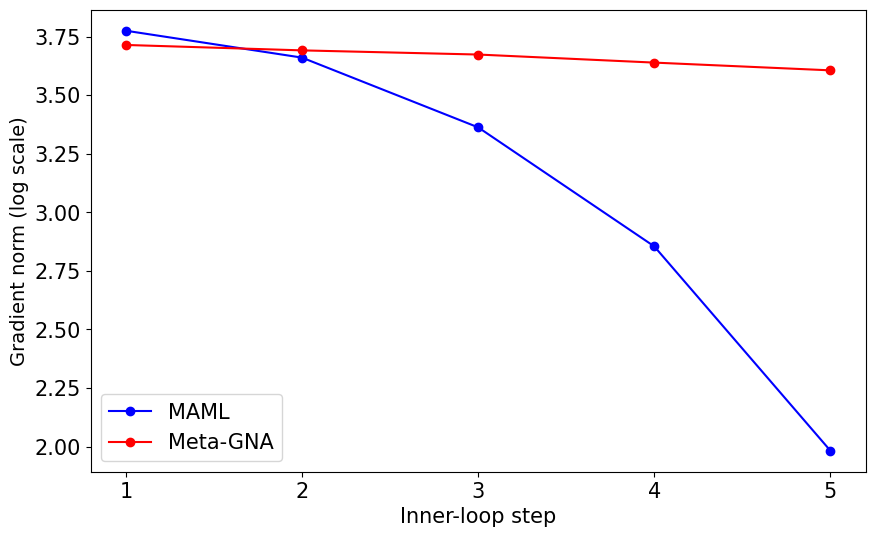

In [102]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))
        
maml_mean_df = maml_info_cifar_fs['all_grads_l2norm'].mean()
arbiter_mean_df = arbiter_info_CIFAR_FS['all_grads_l2norm'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
# plt.plot(x, before_arbiter_mean_df, '-o', color='g', label='before_Arbiter')
plt.plot(x, arbiter_means, '-o', color='r', label='Meta-GNA')

plt.legend()


# plt.title('Gradient Norm')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('Gradient norm (log scale)', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('cifar-fs_gradient_norm' + '.png')

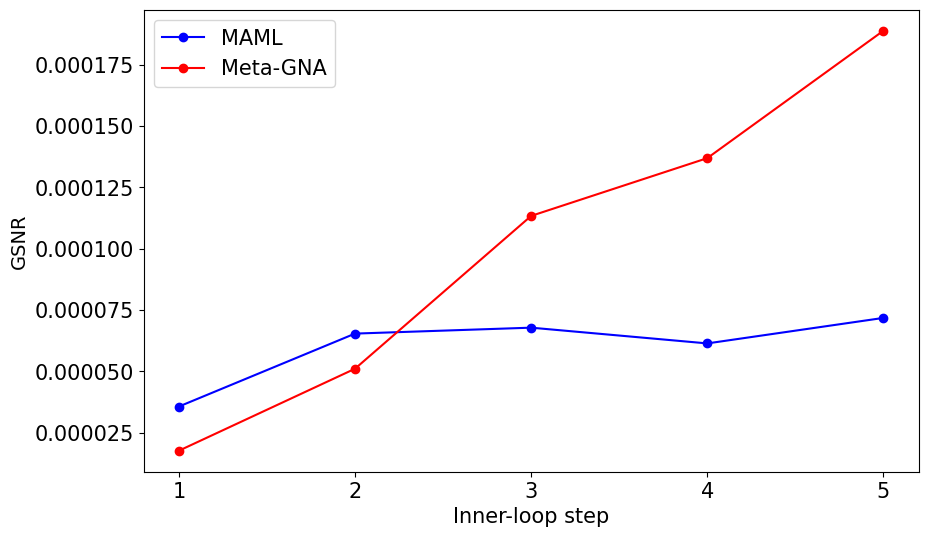

In [103]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(str(int(name)+1))

x = range(len(group_names))
        
maml_mean_df = maml_info_cifar_fs['gsnr'].mean()
arbiter_mean_df = arbiter_info_CIFAR_FS['gsnr'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Meta-GNA')

# plt.title('GSNR')
plt.xticks(x, group_names)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('GSNR', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('cifar-fs_gsnr' + '.png')